# This notebook was taken from http://www.cse.msu.edu/~ptan/dmbook/software/
modified by Yuzhen Ye for B565, 2023

# Module 3: Data Exploration

The following tutorial contains examples of Python code for data exploration. You should refer to the "Data Exploration" chapter of the "Introduction to Data Mining" book (available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial notebook. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb.

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. <font color='red'>To help users select the appropriate preprocessing and data analysis technique used.</font>
2. <font color='red'>To make use of humans’ abilities to recognize patterns in the data.</font>

Read the step-by-step instructions below carefully. To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

## 3.1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. In this tutorial, we will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica) 

In this tutorial, you will learn how to:

- Load a CSV data file into a Pandas DataFrame object.

- Compute various summary statistics from the DataFrame.

To execute the sample program shown here, make sure you have installed the Pandas library (see Module 2).

**1.** First, you need to download the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository.

**<font color='red'>Code:</font>** The following code uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the first five rows of the data frame.

In [254]:
import pandas as pd

#data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data = pd.read_csv('/kaggle/input/iris-dataset/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**2.** For each quantitative attribute, calculate its mean (average), standard deviation, minimum, and maximum values.

Given a random variable $x$ of $n$ dimensions, 

mean($x$): $\bar x = \frac{1}{n}\sum\limits_{k=1}^{n}x_k$

standard deviation ($x$): $s_x$ = $\sqrt{\frac{1}{n-1}\sum\limits_{k=1}^n(x_k - \bar x)^2}$

variance: $s_x^2$ = $\frac{1}{n-1}\sum_{k=1}^n(x_k - \bar x)^2$


**<font color="red">Code:</font>**

In [255]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** For the qualitative attribute (class), count the frequency for each of its distinct values.

**<font color="red">Code:</font>**

In [256]:
data['class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: class, dtype: int64

**4.** It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values. 

**<font color="red">Code:</font>**

In [257]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Note that count refers to the number of non-missing values for each attribute.

**5.** For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

Given two variables $x$ and $y$ of $n$ dimensions,

covariance($x$, $y$) = $s_{xy} = \frac{1}{n-1} \sum_{k=1}^n (x_k - \bar x) (y_k - \bar y)$

corr($x$, $y$) = $\frac{covariance(x, y)}{standard\_deviation(x) \times standard\_deviation(y)} = \frac{s_{xy}}{s_x s_y}$

**<font color="red">Code:</font>**

In [258]:
print('Covariance:')
data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.039268,1.273682,0.516904
sepal width,-0.039268,0.188004,-0.321713,-0.117981
petal length,1.273682,-0.321713,3.113179,1.296387
petal width,0.516904,-0.117981,1.296387,0.582414


In [259]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


## 3.2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships
among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 3.1. To execute the sample program shown here, make sure you have installed the matplotlib library package (see Module 0 on how to install Python packages).

**1.** First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

**<font color="red">Code:</font>**

<AxesSubplot:>

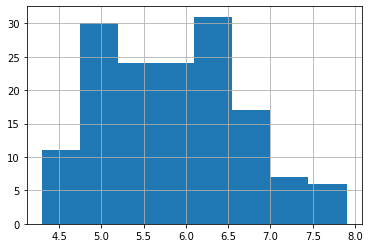

In [260]:
%matplotlib inline

data['sepal length'].hist(bins=8)

**2.** A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red">Code:</font>**

<AxesSubplot:>

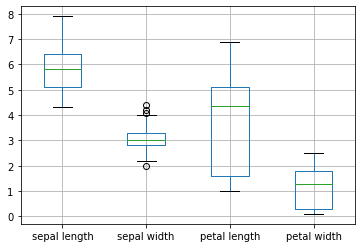

In [261]:
data.boxplot()

**3.** For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

**<font color="red">Code:</font>**

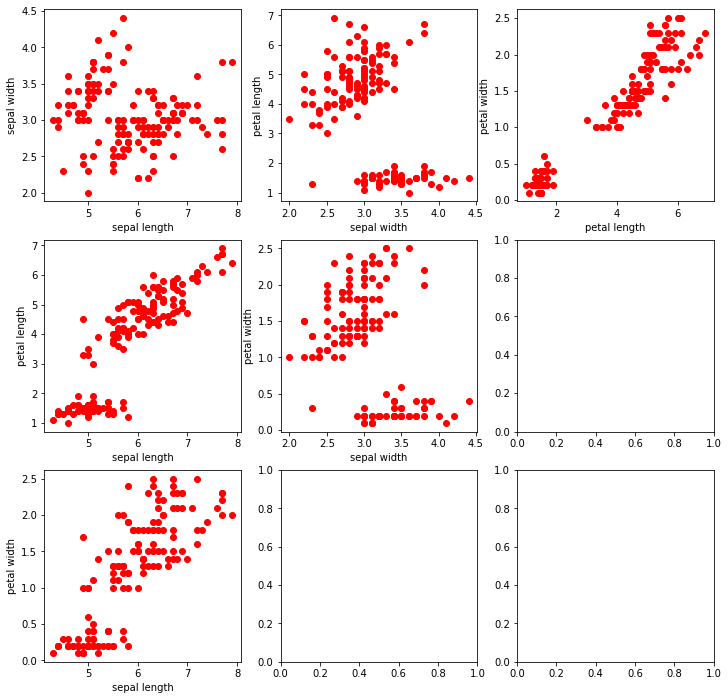

In [262]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax2 = i
        ax1 = j - i - 1
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])

print()

**4.** Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

**<font color="red">Code:</font>**

<AxesSubplot:>

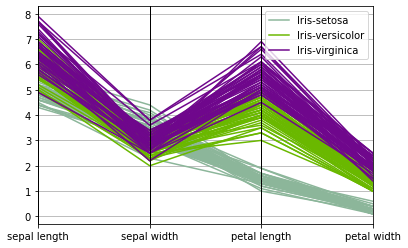

In [263]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

## 3.3. Summary

This tutorial presents several examples for data exploration and visualization using the Pandas and matplotlib library packages available in Python. 

**<font color='blue'>References:</font>**

1. Documentation on Pandas. https://pandas.pydata.org/
2. Documentation on matplotlib. https://matplotlib.org/
3. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

ejrubins HW 2 Edits

Text(0.5, 1.0, 'Histogram of Petal Width')

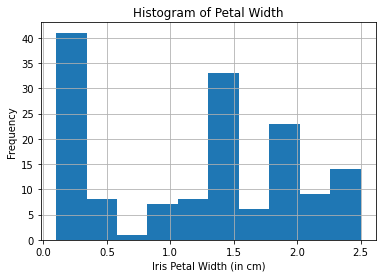

In [264]:
#1a
%matplotlib inline

plot = data['petal width'].hist(bins=10)
plot.set_xlabel('Iris Petal Width (in cm)')
plot.set_ylabel('Frequency')
plot.set_title('Histogram of Petal Width')

1b) Based on the scatter of all pairs of attributes, it looks like petal width and petal length have the strongest correlation

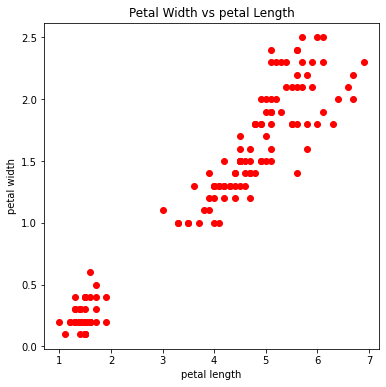

In [265]:
#1c
import matplotlib.pyplot as plt

length = 'petal length'
width  = 'petal width'

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(data[length], data[width], color='red')
ax.set_xlabel(length)
ax.set_ylabel(width)
_ = ax.set_title('Petal Width vs petal Length')

print()

1d) The petal width and petal length have the closest to 1 correlation coefficient, r

In [266]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


**Question 2**

In [267]:
import pandas as pd

googleData = pd.read_csv('/kaggle/input/google-trends-csv/google_trends.csv', header = 0)
googleData.columns = ['Week', 'Labubu', 'Lafufu', 'Bison']

googleData.head()

,Week,Labubu,Lafufu,Bison
0,2024-12-08,0,0,0
1,2024-12-15,43,0,0
2,2024-12-22,0,0,0
3,2024-12-29,0,0,0
4,2025-01-05,0,0,0


In [268]:
print('Correlation:')
googleData.corr()

Correlation:


,Labubu,Lafufu,Bison
Labubu,1.000000,0.910767,0.838075
Lafufu,0.910767,1.000000,0.796217
Bison,0.838075,0.796217,1.000000


<AxesSubplot:>

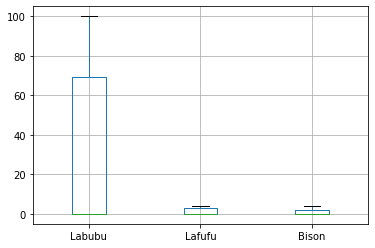

In [269]:
#2a
googleData.boxplot()

In [270]:
#2b
import pandas as pd

# keep date separate
date_col = 'Week'
val_cols = googleData.columns.difference([date_col])

vals = googleData[val_cols].apply(pd.to_numeric, errors='coerce')

# min–max per column
mins = vals.min()
ranges = vals.max() - mins

# avoid divide-by-zero for constant columns
ranges_safe = ranges.replace(0, 1)
norm = (vals - mins) / ranges_safe

# set constant columns to 0 (all values equal)
norm.loc[:, ranges == 0] = 0

# put date back for one DataFrame
googleData_n = pd.concat([googleData[[date_col]], norm], axis=1)

Raw data:



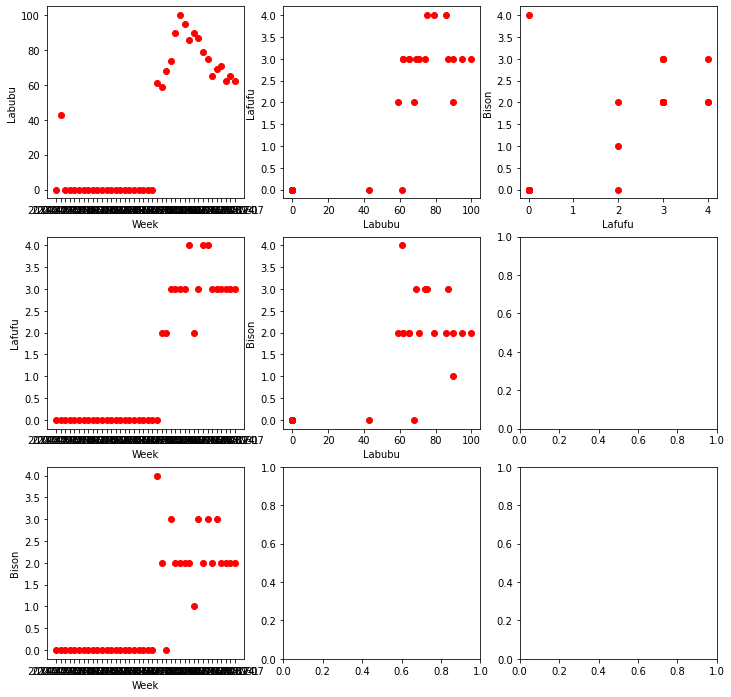

In [271]:
import matplotlib.pyplot as plt

print('Raw data:')

fig, axes = plt.subplots(3, 3, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax2 = i
        ax1 = j - i - 1
        axes[ax1][ax2].scatter(googleData[googleData.columns[i]], googleData[googleData.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(googleData.columns[i])
        axes[ax1][ax2].set_ylabel(googleData.columns[j])

print()

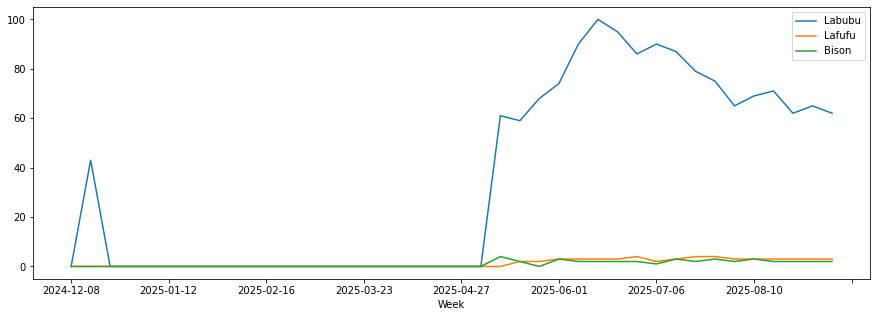

In [272]:
df = googleData.set_index('Week')[['Labubu','Lafufu','Bison']]
df.plot(figsize=(15,5))
plt.show()

<AxesSubplot:>

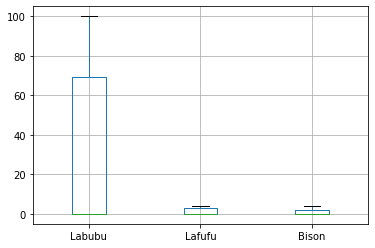

In [273]:
googleData.boxplot()

min-max normalization:



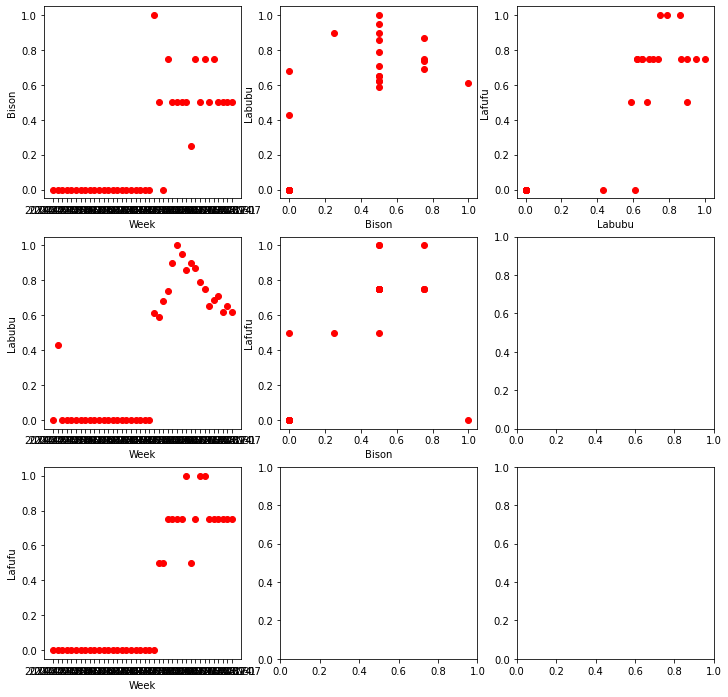

In [274]:
import matplotlib.pyplot as plt

print('min-max normalization:')

fig, axes = plt.subplots(3, 3, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax2 = i
        ax1 = j - i - 1
        axes[ax1][ax2].scatter(googleData_n[googleData_n.columns[i]], googleData_n[googleData_n.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(googleData_n.columns[i])
        axes[ax1][ax2].set_ylabel(googleData_n.columns[j])

print()

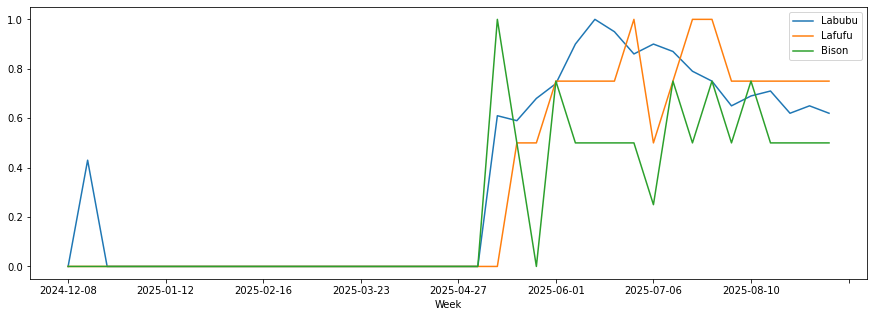

In [275]:
df = googleData_n.set_index('Week')[['Labubu','Lafufu','Bison']]
df.plot(figsize=(15,5))
plt.show()

<AxesSubplot:>

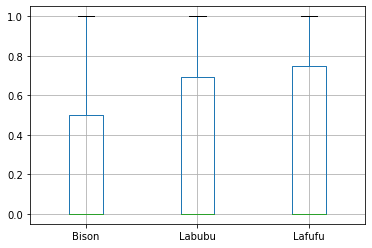

In [276]:
googleData_n.boxplot()

2c) min-max normalization is useful for this data. It significantly affects the time series and boxplot visualization of the data.